## WeatherPy_Brucato

Create a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=70)
lngs = np.random.uniform(low=-180.000, high=180.000, size=70)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

59

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

city_counter = 1
set_counter = 1
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")
print("-----------")

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        city_counter = 1
    query_url = url +"&q=" + city
    response = requests.get(query_url).json()
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    city_counter += 1
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found.")
        pass

print("-----------")
print("Completed")

Started
-----------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | padang
Processing Record 3 of Set 1 | berlevag
Processing Record 4 of Set 1 | manokwari
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | lithgow
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | attawapiskat
City not found.
Processing Record 16 of Set 1 | daru
Processing Record 17 of Set 1 | sterling
Processing Record 18 of Set 1 | kahului
Processing Record 19 of Set 1 | yirol
City not found.
Processing Record 20 of Set 1 | manggar
Processing Record 21 of Set 1 | longyearbyen
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set 1 | warqla
City not found.
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
# create dictionary 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create data frame and count variables for each column
weather_df = pd.DataFrame(weather_data)
weather_df.count()

City          50
Cloudiness    50
Country       50
Date          50
Humidity      50
Lat           50
Lng           50
Max Temp      50
Wind Speed    50
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,0,PF,1578408991,82,-23.12,-134.97,76.41,17.34
1,Padang,62,ID,1578408846,93,-0.92,100.36,69.39,4.76
2,Berlevag,100,NO,1578408992,85,70.86,29.09,32.00,29.97
3,Manokwari,100,ID,1578408913,92,-0.87,134.08,73.24,6.67
4,Lebu,100,ET,1578408992,53,8.96,38.73,66.49,10.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

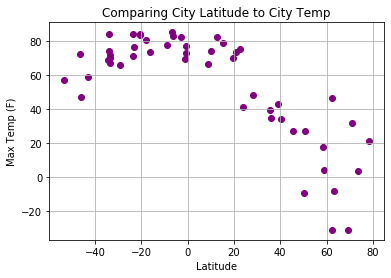

In [19]:
# create scatter plot for lat vs temp 
plt.title("Comparing City Latitude to City Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", color="purple")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

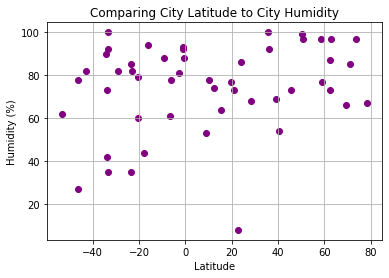

In [21]:
# create scatter plot for lat vs humidity 
plt.title("Comparing City Latitude to City Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", color="purple")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

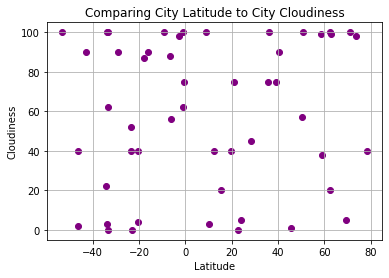

In [22]:
# create scatter plot for lat vs cloudiness 
plt.title("Comparing City Latitude to City Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", color="purple")
plt.grid()
plt.show()